# Вычисление площадей минимального и максимального треугольника (квадрата) на множестве точек плоскости #
-------------------------------------------------------------------------------------------------

Импортируем необходимые библиотеки для проекта

In [1]:
from random import randrange
from typing import List
import math
import matplotlib.pyplot as plt

%matplotlib inline

Создадим класс точка

In [2]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

Функция для генерации точек на плоскости

In [3]:
def generate_point(count: int) -> List[Point]:
    points: List[Point] = []
    for i in range(count):
        points.append(Point(randrange(0, 5), randrange(0, 5)))
    return points

## Итак, начнём с треугольника
------------------------

### Как найти площадь треугольника по координатам его вершин?


Способ 1. Найти длины трёх сторон треугольника и вычислить площадь по формуле Герона. Способ удобен, если длины сторон являются целыми числами. В противном случае предстоят громоздкие вычисления.

Способ 2. Вывести формулу для нахождения площади и использовать её для вычисления.

*Утверждение*

*Площадь треугольника ABC с вершинами в точках A(x1;y1), B(x2;y2), C(x3;y3) можно вычислить с помощью формулы*

![Формула площади треугольника](image/1.png)

**Доказательство:**

Рассмотрим треугольник ABC, с вершинами A(x1;y1), B(x2;y2), C(x3;y3)

![Треугольник](image/triangle.png)

Опустим перпендикуляры из вершин треугольника на координатные оси.

![Треугольник](image/proof_1.png)
![Треугольник](image/proof_2.png)
![Треугольник](image/proof_3.png)
![Треугольник](image/proof_4.png)
![Треугольник](image/proof_5.png)
![Треугольник](image/proof_6.png)
![Треугольник](image/proof_7.png)
![Треугольник](image/proof_8.png)
![Треугольник](image/proof_9.png)
![Треугольник](image/proof_10.png)
![Треугольник](image/proof_11.png)
![Треугольник](image/proof_12.png)
![Треугольник](image/proof_13.png)

С учетом вариантов взаимного расположения точек A, B и C формула для вычисления площади треугольника по координатам его вершин приобретает вид:

![Формула площади треугольника](image/1.png)

Что и требовалось доказать.

#### Функция для нахождения максимальной и минимальной площади треугольника, также вернёт координаты треугольников

In [4]:
def calculating_area_triangle(points: List[Point]) -> tuple[int, tuple[int, int, int], int, tuple[int, int, int]]:
    eps = 1e-10
    min_area = 0
    max_area = 0
    coords_min_area = ()
    coords_max_area = ()

    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            vectors_x1 = points[j].x - points[i].x
            vectors_y1 = points[j].y - points[i].y
            for k in range(i + 2, len(points)):
                vectors_x2 = points[k].x - points[i].x
                vectors_y2 = points[k].y - points[i].y
                area = abs(vectors_x1 * vectors_y2 - vectors_x2 * vectors_y1)

                if area > max_area:
                    max_area = area
                    coords_max_area = (i, j, k)

                if area > eps and (min_area - area > eps or min_area < eps):
                    min_area = area
                    coords_min_area = (i, j, k)

    return min_area, coords_min_area, max_area, coords_max_area

### Демонстрация работы алгоритма

Для начала создадим n-ое количество точек на плоскости

In [5]:
points = generate_point(count=10)

Воспользуемся функцией для нахождения площади треугоника

In [6]:
min_area, coords_min_area, max_area, coords_max_area = calculating_area_triangle(points)

#### Запишем координаты по X и Y в отдельные переменные, чтобы вывести графики

In [7]:
coords_x_min = [points[coords_min_area[i]].x for i in range(3)]
coords_y_min = [points[coords_min_area[i]].y for i in range(3)]
coords_x_min.append(points[coords_min_area[0]].x)
coords_y_min.append(points[coords_min_area[0]].y)

In [8]:
coords_x_max = [points[coords_max_area[i]].x for i in range(3)]
coords_y_max = [points[coords_max_area[i]].y for i in range(3)]
coords_x_max.append(points[coords_max_area[0]].x)
coords_y_max.append(points[coords_max_area[0]].y)

#### Площадь наименьшего треугольника равна и его координаты:

In [9]:
min_area

1

In [10]:
print(f"{points[coords_min_area[0]].x, points[coords_min_area[0]].y}\n"
      f"{points[coords_min_area[1]].x, points[coords_min_area[1]].y}\n"
      f"{points[coords_min_area[2]].x, points[coords_min_area[2]].y}")

(1, 4)
(2, 4)
(0, 3)


#### Площадь наибольшего треугольника равна и его координаты:

In [11]:
max_area

14

In [12]:
print(f"{points[coords_max_area[0]].x, points[coords_max_area[0]].y}\n"
      f"{points[coords_max_area[1]].x, points[coords_max_area[1]].y}\n"
      f"{points[coords_max_area[2]].x, points[coords_max_area[2]].y}")

(1, 4)
(4, 2)
(0, 0)


#### Выведем графики с использованием записанных ранее координат

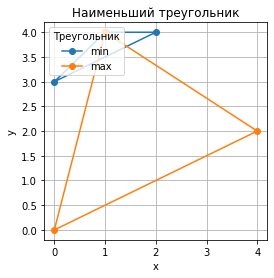

In [13]:
# Построение графика
plt.figure(figsize=(4,4))
plt.title("Наименьший треугольник") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(coords_x_min, coords_y_min, coords_x_max, coords_y_max, marker="o")  # построение графика
plt.legend(['min', 'max'], loc=2, title='Треугольник')

## С треугольником разобрались, теперь приступим к квадрату
----------------------------------

### Как найти площадь квадрата по координатам его вершин?

**Будем выводить формулу**

Для вывода формулы площади многоугольника нам понадобятся сведения из вычислительной геометрии, а именно, понятие ориентированной площади треугольника.

Ориентированная площадь треугольника – это обычная площадь, снабженная знаком. Знак ориентированной площади треугольника АВС такой же, как у ориентированного угла между векторами AB и AC. То есть ее знак зависит от порядка перечисления вершин.

![Визуализация векторов](image/2.png)

На рис.1 треугольник АВС – прямоугольный. Его ориентированная площадь равна ![Визуализация векторов](image/3.gif)
(она больше нуля, так как пара OB, OC. Площадь многоугольника ориентирована положительно).  Эту же величину можно вычислить другим способом.

Пусть О – произвольная точка плоскости. На рисунке площадь треугольника ABC получится, если из площади треугольника OBC вычесть площади OAB и OCA. Таким образом, нужно просто сложить ориентированные площади треугольников OAB, OBC и OCA. Это правило работает при любом выборе точки О.

Точно так же для вычисления площади любого многоугольника ![Точки](image/4.gif)
нужно сложить ориентированные площади треугольников ![Точки](image/5.gif)
![Точки](image/3.png)

В сумме получится площадь многоугольника, взятая со знаком плюс, если при обходе ломаной ![Точки](image/4.gif)
многоугольника находится слева (обход границы против часовой стрелки), и со знаком минус, если он находится справа (обход по часовой стрелке).

Итак, вычисление площади многоугольника свелось к нахождению площади треугольника. Посмотрим, как выразить ее в координатах.

Векторное произведение двух векторов на плоскости есть площадь параллелограмма, построенного на этих векторах.

![Точки](image/4.png)

Векторное произведение, выраженное через координаты векторов:

![Точки](image/6.gif)

Площадь треугольника будет равна половине этой площади:

![Точки](image/7.gif)

В качестве точки О удобно взять начало координат, тогда координаты векторов, на основании которых вычисляются ориентированные площади, совпадут с координатами точек.

Пусть (х1, y1), (x2, у2), …, (хN,уN) —координаты вершин заданного многоугольника в порядке обхода по или против часовой стрелки. Тогда его ориентированная площадь S будет равна:

![Точки](image/5.png)

Это и есть наша рабочая формула, она используется в нашей программе.

#### Функция для вычисление векторного произведения

In [14]:
def composition_vector(point_a: Point, point_b: Point):
    return point_a.x * point_b.y - point_a.y * point_b.x

#### Функция для вычисление координат вектора

In [15]:
def calc_vector_coordinates(point_b: Point, point_a: Point):
    return point_b.x - point_a.x, point_b.y - point_a.y

#### Функция для вычисления площади квадрата

In [16]:
def calculation_area(point_a: Point, point_b: Point, point_c: Point, point_d: Point):
    return sum((composition_vector(point_a, point_b),
                composition_vector(point_b, point_c),
                composition_vector(point_c, point_d),
                composition_vector(point_d, point_a))) / 2

#### Функция для нахождения максимальной и минимальной площадей квадрата, также вернёт координаты треугольников

In [17]:
def square(points):
    eps = 1e-10
    min_area = 0
    max_area = 0
    coords_min_area = ()
    coords_max_area = ()

    for a in range(len(points)):
        for b in range(len(points)):
            if b != a:
                for c in range(len(points)):
                    if c != a and c != b:
                        vector_a = calc_vector_coordinates(points[b], points[a])
                        vector_b = calc_vector_coordinates(points[c], points[b])
                        if vector_a[0] == vector_b[1] and abs(vector_a[1]) == vector_b[0]:
                            for d in range(len(points)):
                                vector_c = calc_vector_coordinates(points[d], points[c])
                                if abs(vector_a[0]) == vector_c[0] and abs(vector_a[1]) == vector_c[1]:
                                    area = calculation_area(points[a], points[b], points[c], points[d])

                                    if area > max_area:
                                        max_area = area
                                        coords_max_area = (a, b, c, d)

                                    if area > eps and (min_area - area > eps or min_area < eps):
                                        min_area = area
                                        coords_min_area = (a, b, c, d)

    return min_area, coords_min_area, max_area, coords_max_area

### Демонстрация работы алгоритма

Для начала создадим n-ое количество точек на плоскости

In [18]:
points = generate_point(count=100)

Воспользуемся функцией для нахождения максимальной и минимальной площадей квадрата

In [19]:
min_area, coords_min_area, max_area, coords_max_area = square(points)

In [20]:
if min_area == 0 and max_area == 0:
    print("Квадрат не найден")
else:
    print(f"Площадь наибольшего квадрата равна: {max_area}")
    print(f"Его координаты:"
          f" {points[coords_max_area[0]].x, points[coords_max_area[0]].y},"
          f" {points[coords_max_area[1]].x, points[coords_max_area[1]].y},"
          f" {points[coords_max_area[2]].x, points[coords_max_area[2]].y},"
          f" {points[coords_max_area[3]].x, points[coords_max_area[3]].y}")
    print(f"Площадь наименьшего квадрата равна: {min_area}")
    print(f"Его координаты:"
          f" {points[coords_min_area[0]].x, points[coords_min_area[0]].y},"
          f" {points[coords_min_area[1]].x, points[coords_min_area[1]].y},"
          f" {points[coords_min_area[2]].x, points[coords_min_area[2]].y},"
          f" {points[coords_min_area[3]].x, points[coords_min_area[3]].y}")

Площадь наибольшего квадрата равна: 16.0
Его координаты: (0, 4), (0, 0), (4, 0), (4, 4)
Площадь наименьшего квадрата равна: 1.0
Его координаты: (0, 4), (0, 3), (1, 3), (1, 4)


#### Запишем координаты по X и Y в отдельные переменные, чтобы вывести графики

In [21]:
coords_x_min = [points[coords_min_area[i]].x for i in range(len(coords_min_area))]
coords_y_min = [points[coords_min_area[i]].y for i in range(len(coords_min_area))]
coords_x_min.append(points[coords_min_area[0]].x)
coords_y_min.append(points[coords_min_area[0]].y)

In [22]:
coords_x_max = [points[coords_max_area[i]].x for i in range(len(coords_max_area))]
coords_y_max = [points[coords_max_area[i]].y for i in range(len(coords_max_area))]
coords_x_max.append(points[coords_max_area[0]].x)
coords_y_max.append(points[coords_max_area[0]].y)

#### Выведем графики с использованием записанных ранее координат

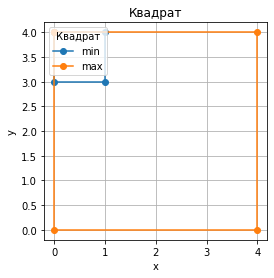

In [23]:
# Построение графика
plt.figure(figsize=(4,4))
plt.title("Квадрат") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(coords_x_min, coords_y_min, coords_x_max, coords_y_max, marker="o")  # построение графика
plt.legend(['min', 'max'], loc=2, title='Квадрат')